In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_excel('中文关键词标注.xlsx')
d={}
for i in range(len(df)):
    row=df.iloc[i]
    if row['类别']!=0:
        d[row['keywords']]=row['类别']

In [4]:
d

{'前台': '服务',
 '早餐': '服务',
 '服务员': '服务',
 '设施': '设施',
 '价格': '价位',
 '卫生间': '设施',
 '餐厅': '服务',
 '大堂': '设施',
 '态度': '服务',
 '人员': '服务',
 '空调': '设施',
 '电话': '设施',
 '客房': '设施',
 '床': '设施',
 '交通': '交通',
 '饭店': '设施',
 '味道': '环境',
 '隔音': '环境',
 '性价比': '价位',
 '热情': '服务',
 '电梯': '设施',
 '商务': '价位',
 '服务态度': '服务',
 '楼层': '环境',
 '经理': '服务',
 '硬件': '设施',
 '水': '设施',
 '机场': '交通',
 '地理位置': '交通',
 '声音': '环境',
 '宽带': '设施',
 '房价': '价位',
 '结帐': '价位',
 '窗户': '设施',
 '出租车': '交通',
 '地毯': '设施',
 '收费': '价位',
 '水果': '设施',
 '总台': '设施',
 '星级': '价位',
 '电视': '设施',
 '行政': '服务',
 '电脑': '设施',
 '员工': '服务',
 '浴室': '设施',
 '门': '设施',
 '大床': '设施',
 '热水': '设施',
 '车': '交通',
 '速度': '服务',
 '钱': '价位',
 '服务生': '服务',
 '套房': '设施',
 '标间': '设施',
 '走廊': '设施',
 '工作人员': '服务',
 '房间内': '环境',
 '火车站': '交通',
 '洗手间': '设施',
 '办理': '服务',
 '联系': '服务',
 '司机': '交通',
 '路': '交通',
 '信用卡': '价位',
 '床单': '设施',
 '浴缸': '设施',
 '距离': '交通',
 '门童': '服务',
 '步行': '交通',
 '游泳池': '设施',
 '标准间': '设施',
 '被子': '设施',
 '淋浴': '设施',
 '马路': '交通',
 '房费': '价位',
 '阳台': '设施',
 

In [4]:
with open('中文主题词.txt','r',encoding='utf-8')as f:
    rows=f.readlines()
    dl=[]
    for i in range(len(rows)):
        row=rows[i]
        dd={}
        for r in row.split('\t')[1].split():
            k,v=r.split(':')
            if k in d:
                if d[k] in dd:
                    dd[d[k]]+=float(v)
                else:
                    dd[d[k]]=float(v)
        dl.append(dd)

服务    0.098430
设施    0.132389
价位    0.039789
环境    0.031537
交通    0.036797
餐饮    0.022586
卫生    0.009198
dtype: float64

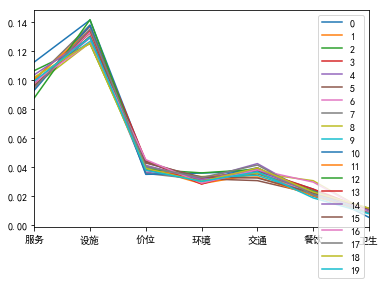

In [14]:
X=pd.DataFrame(dl)
pd.DataFrame(dl).T.plot()
X1_mean=X.mean()
X1_mean

In [9]:
X.mean()

服务    0.098430
设施    0.132389
价位    0.039789
环境    0.031537
交通    0.036797
餐饮    0.022586
卫生    0.009198
dtype: float64

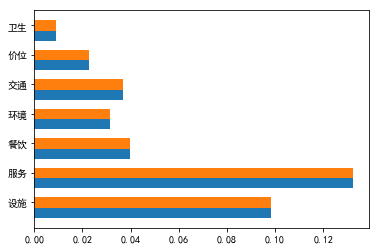

In [12]:
bar_width = 0.35
plt.barh(np.arange(7)-bar_width/2,X.mean().values,bar_width,tick_label=['设施', '服务', '餐饮', '环境', '交通', '价位', '卫生'])
plt.barh(np.arange(7)+bar_width/2,X.mean().values,bar_width,tick_label=['设施', '服务', '餐饮', '环境', '交通', '价位', '卫生'])
plt.show()

In [16]:
with open('英文主题词.txt','r',encoding='utf-8')as f:
    rows=f.readlines()
    dl=[]
    for i in range(len(rows)):
        row=rows[i]
        dd={}
        for r in row.split('\t')[1].split():
            k,v=r.split(':')
            if k in d:
                if d[k] in dd:
                    dd[d[k]]+=float(v)
                else:
                    dd[d[k]]=float(v)
        dl.append(dd)

In [15]:
df=pd.read_excel('英文关键词标注.xlsx')
d={'experience':'卫生',
'facility':'设施',
'staff':'服务',
'price':'价位',
'internet':'服务',
'room':'卫生',
'food':'餐饮',
'environment':'环境',
'travel':'交通',
'location':'交通',
'service':'服务'}
df=df[df['category']!=0]
df['category']=df['category'].apply(lambda x:x.strip())
df['类别']=df['category'].apply(lambda x:d[x])
xs=[]
for k in  ['设施', '服务', '餐饮', '环境', '交通', '价位', '卫生']:
    x=df[df['类别']==k][['keywords','probability']].head(500)
    y=x.reset_index(drop=True)
    y.columns=[k+'_'+col for col in y.columns]
    xs.append(y)
ddf=pd.concat(xs,axis=1)
ddf

,设施_keywords,设施_probability,服务_keywords,服务_probability,餐饮_keywords,餐饮_probability,环境_keywords,环境_probability,交通_keywords,交通_probability,价位_keywords,价位_probability,卫生_keywords,卫生_probability
0,bed,0.176433,staff,0.491883,breakfast,0.313203,clean,0.161642,location,0.313044,price,0.053741,friendly,0.185393
1,bathroom,0.108881,reception,0.093469,food,0.073457,view,0.066670,station,0.101962,money,0.039949,helpful,0.181305
2,bar,0.103246,free,0.069354,restaurant,0.066468,quiet,0.062824,walk,0.097426,expensive,0.034451,nice,0.181103
3,shower,0.090100,told,0.044158,coffee,0.064701,air,0.041291,close,0.096354,pay,0.031308,comfortable,0.143161
4,floor,0.065792,wifi,0.041842,tea,0.041500,noise,0.036726,city,0.064717,star,0.029592,excellent,0.133622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,complaining,0.000158
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amazingly,0.000157
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inconvenience,0.000153
164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,leisure,0.000151


服务    0.030690
交通    0.016233
餐饮    0.003673
价位    0.002687
卫生    0.001264
设施    0.000335
环境    0.000162
dtype: float64

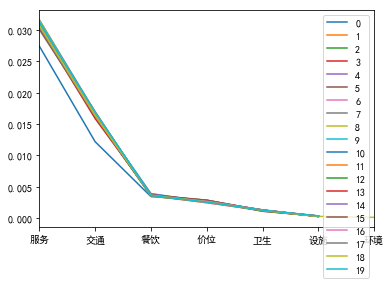

In [17]:
X=pd.DataFrame(dl)
pd.DataFrame(dl).T.plot()
X2_mean=X.mean()
X2_mean

In [108]:
X1_mean.index,X2_mean.index

(Index(['服务', '设施', '价位', '环境', '交通', '餐饮', '卫生'], dtype='object'),
 Index(['服务', '交通', '餐饮', '价位', '卫生', '设施', '环境'], dtype='object'))

In [110]:
X1_mean.values/sum(X1_mean.values)

array([0.26550695, 0.35710662, 0.10732666, 0.08506775, 0.09925775,
       0.06092362, 0.02481066])

In [136]:
ddd={'Service':'服务','Facility':'设施','Cleanness':'卫生','Environment':'环境','Transportation':'交通','Food':'餐饮','Price':'价位'}
trans={}
for k in ddd:
    trans[ddd[k]]=k
trans

{'服务': 'Service',
 '设施': 'Facility',
 '卫生': 'Cleanness',
 '环境': 'Environment',
 '交通': 'Transportation',
 '餐饮': 'Food',
 '价位': 'Price'}

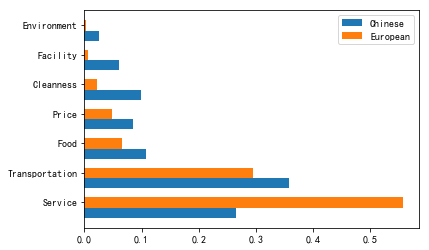

In [137]:
bar_width = 0.35
plt.barh(np.arange(7)-bar_width/2,X1_mean.values/sum(X1_mean.values),bar_width,label='Chinese',tick_label=[trans[word] for word in X1_mean.index])
plt.barh(np.arange(7)+bar_width/2,X2_mean.values/sum(X2_mean.values),bar_width,label='European',tick_label=[trans[word] for word in X2_mean.index])
plt.legend()
plt.show()


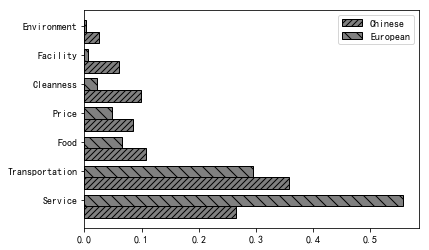

<Figure size 432x288 with 0 Axes>

In [153]:
bar_width = 0.4
plt.barh(np.arange(7)-bar_width/2,X1_mean.values/sum(X1_mean.values),bar_width,label='Chinese',tick_label=[trans[word] for word in X1_mean.index],hatch="////",color='grey',edgecolor='black')
plt.barh(np.arange(7)+bar_width/2,X2_mean.values/sum(X2_mean.values),bar_width,label='European',tick_label=[trans[word] for word in X2_mean.index],hatch="\\\\",color='grey',edgecolor='black')
plt.legend()
plt.show()

plt.savefig('scores_par.png')


In [121]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the  appearance. Line properties and *fmt* can be mixed.
    The following two calls yield identical resu

In [22]:
sum(X1_mean),sum(X2_mean)

(0.3707257, 0.0550443)

In [30]:
xx=MinMaxScaler().fit_transform(pd.DataFrame([X1_mean,X2_mean]).T)

In [32]:
xx[:,0]

array([0.72434312, 1.        , 0.24832079, 0.1813356 , 0.22403851,
       0.10867708, 0.        ])

In [35]:
X1_mean.values/sum(X1_mean.values)

array([0.26550695, 0.35710662, 0.10732666, 0.08506775, 0.09925775,
       0.06092362, 0.02481066])

In [39]:
X1_mean

服务    0.098430
设施    0.132389
价位    0.039789
环境    0.031537
交通    0.036797
餐饮    0.022586
卫生    0.009198
dtype: float64

In [181]:
def sort_vlues(X1_mean):
    x1=pd.DataFrame()
    x1['attribute']=X1_mean.index
    x1['value']=X1_mean.values/sum(X1_mean.values)
    y1=x1.sort_values('value',ascending=False)
    return y1

In [182]:
y1=sort_vlues(X1_mean)
y2=sort_vlues(X2_mean)

In [183]:
y1

,attribute,value
1,设施,0.357107
0,服务,0.265507
2,价位,0.107327
4,交通,0.099258
3,环境,0.085068
5,餐饮,0.060924
6,卫生,0.024811


In [184]:
y2

,attribute,value
0,服务,0.557554
1,交通,0.294912
2,餐饮,0.066725
3,价位,0.048816
4,卫生,0.022957
5,设施,0.006093
6,环境,0.002943


In [185]:
c1,c2=[],[]
y2=sort_vlues(X2_mean)
y2=y2.set_index('attribute')
for i in y1['attribute']:
    c1.append(i)
    c2.append(y2.loc[i]['value'])
z

,attribute,value
5,设施,0.006093


In [186]:
z['attribute']

5    设施
Name: attribute, dtype: object

In [187]:
y2.set_index('attribute').loc[]

SyntaxError: invalid syntax (<ipython-input-187-1a81c209d9d7>, line 1)

In [188]:
c1

['设施', '服务', '价位', '交通', '环境', '餐饮', '卫生']

In [189]:
c2

[0.006093273962971641,
 0.5575536431565121,
 0.0488161353673314,
 0.2949115530581731,
 0.0029430840250489155,
 0.06672534667531424,
 0.022956963754648535]

In [190]:
y3=pd.DataFrame()
y3['attribute']=c1
y3['value']=c2
y3

,attribute,value
0,设施,0.006093
1,服务,0.557554
2,价位,0.048816
3,交通,0.294912
4,环境,0.002943
5,餐饮,0.066725
6,卫生,0.022957


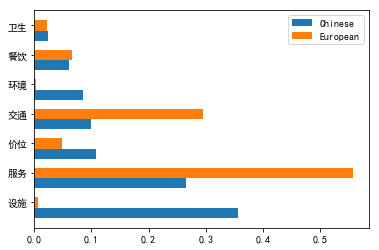

In [191]:
bar_width = 0.35
plt.barh(np.arange(7)-bar_width/2,y1['value'],bar_width,label='Chinese',tick_label=c1)
plt.barh(np.arange(7)+bar_width/2,y3['value'],bar_width,label='European',tick_label=c1)
plt.legend()
plt.show()

In [84]:
y1

,attribute,value
1,设施,0.357107
0,服务,0.265507
2,价位,0.107327
4,交通,0.099258
3,环境,0.085068
5,餐饮,0.060924
6,卫生,0.024811


In [85]:
y3

,attribute,value
0,设施,0.006093
1,服务,0.557554
2,价位,0.048816
3,交通,0.294912
4,环境,0.002943
5,餐饮,0.066725
6,卫生,0.022957


In [197]:
c1
c11=[trans[word] for word in c1]
c11

['Facility',
 'Service',
 'Price',
 'Transportation',
 'Environment',
 'Food',
 'Cleanness']

In [208]:
config = {
    "font.family":'serif',
    "font.size": 10,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
plt.rcParams.update(config)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


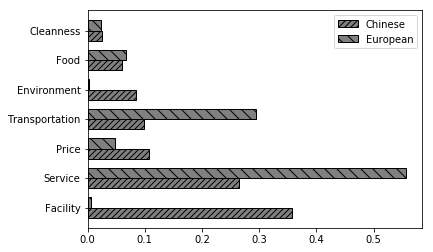

In [214]:
bar_width = 0.35
axes1 = plt.subplot(1, 1, 1)
axes1.barh(np.arange(7)-bar_width/2,y1['value'],bar_width,label='Chinese',hatch="////",color='grey',edgecolor='black')
axes1.barh(np.arange(7)+bar_width/2,y3['value'],bar_width,label='European',hatch="\\\\",color='grey',edgecolor='black')
axes1.legend()
axes1.set_yticklabels(['']+c11)

plt.savefig('黑白.png',dpi=200,bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


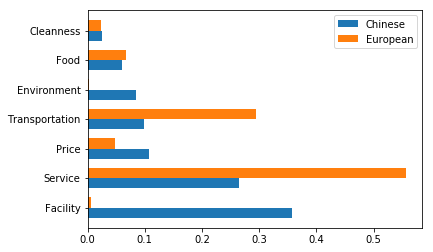

In [213]:
bar_width = 0.35
axes1 = plt.subplot(1, 1, 1)
axes1.barh(np.arange(7)-bar_width/2,y1['value'],bar_width,label='Chinese')
axes1.barh(np.arange(7)+bar_width/2,y3['value'],bar_width,label='European')
axes1.legend()
axes1.set_yticklabels(['']+c11)

plt.savefig('彩色.png',dpi=200, bbox_inches='tight')

In [211]:
y3

,attribute,value
0,设施,0.006093
1,服务,0.557554
2,价位,0.048816
3,交通,0.294912
4,环境,0.002943
5,餐饮,0.066725
6,卫生,0.022957


In [215]:
X

,服务,交通,餐饮,价位,卫生,设施,环境
0,0.027382,0.012190,0.003463,0.002867,0.001309,0.000392,NaN
1,0.031014,0.016960,0.003574,0.002485,0.001268,0.000363,NaN
2,0.030827,0.016441,0.003670,0.002652,0.001335,0.000336,NaN
3,0.031350,0.016354,0.003734,0.002781,0.001132,0.000356,NaN
4,0.030720,0.016736,0.003763,0.002681,0.001219,0.000324,NaN
5,0.030693,0.016310,0.003625,0.002728,0.001347,0.000295,NaN
6,0.031193,0.016492,0.003684,0.002493,0.001221,0.000350,NaN
7,0.031583,0.016913,0.003664,0.002644,0.001240,0.000322,NaN
8,0.031463,0.016527,0.003532,0.002629,0.001204,0.000319,0.000162
9,0.031283,0.016669,0.003948,0.002619,0.001308,0.000292,NaN
